# In this notebook , we perform Data Visualization based on different parameters.

In [3]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [4]:
#reading dataset

df=pd.read_csv('/Users/bibekrai/workspace/Nepal-Livestock-Analysis/Data Analysis/test_data.csv')

In [5]:
df.drop(columns='Unnamed: 0')

,Districts,VDC/Municipality,Cattle,Buffalo,Yak/ Nak/ Chauri,Sheep,Goat,Pig
0,Sankhuwasabha,Ankhibhui,4679,1197,3,69,9081,1557
1,Sankhuwasabha,Bahrabise,1800,241,5,215,2396,328
2,Sankhuwasabha,Bala,1723,172,5,369,1740,754
3,Sankhuwasabha,Bana,3221,706,5,35,5364,967
4,Sankhuwasabha,Baneswor,2476,619,3,41,4922,765
...,...,...,...,...,...,...,...,...
3100,Udayapur,Thoksila,8664,3156,5,366,13386,2359
3101,Udayapur,Tribeni,3218,1476,5,49,7426,421
3102,Udayapur,Triyuga Municipality,15961,4302,5,475,33224,3339
3103,Udayapur,Valayadanda,4952,1052,5,40,13673,596


##  Bar plot to compare the number of livestock in each district

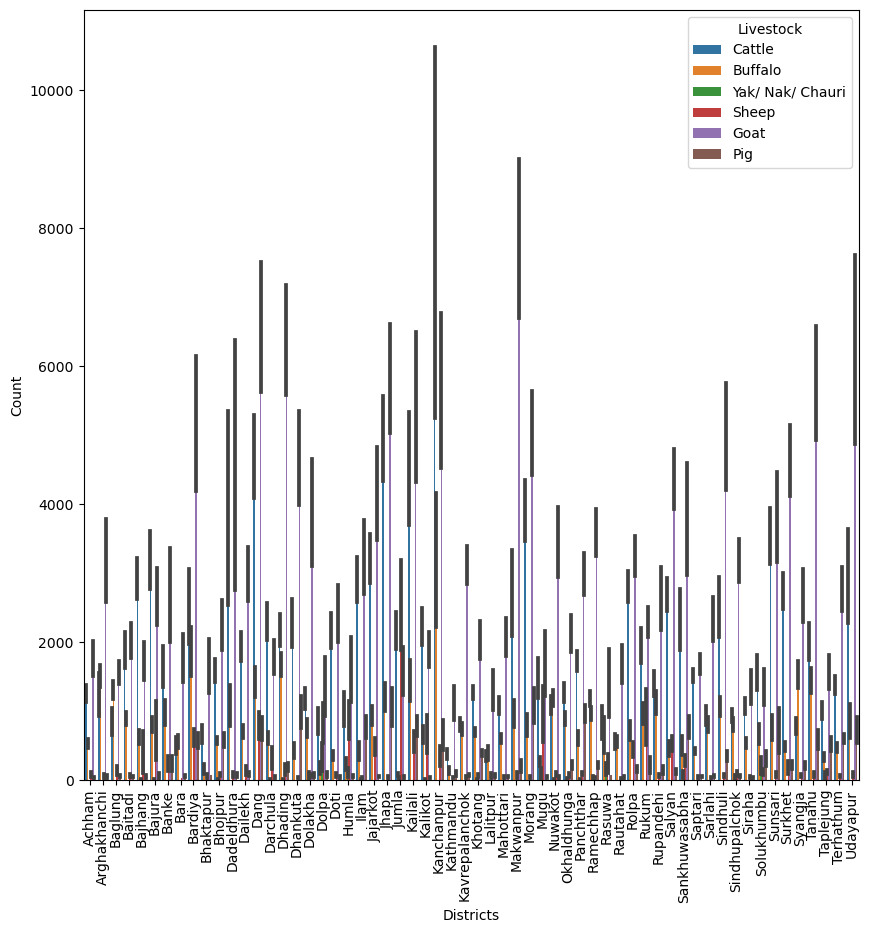

In [6]:
livestock_data = df[['Districts', 'VDC/Municipality', 'Cattle', 'Buffalo', 'Yak/ Nak/ Chauri', 'Sheep', 'Goat', 'Pig']]

livestock_by_location = livestock_data.groupby(['Districts', 'VDC/Municipality']).sum()

livestock_by_location = livestock_by_location.reset_index()

melted_livestock = pd.melt(livestock_by_location, id_vars=['Districts', 'VDC/Municipality'], var_name='Livestock', value_name='Count')

plt.figure(figsize=(10,10))
sns.barplot(data=melted_livestock, x='Districts', y='Count', hue='Livestock')
plt.xticks(rotation=90)
plt.show()


## Box plot to view the distribution of lifestock

In [7]:
df['Buffalo'].describe()

count     3105.000000
mean       779.011594
std        658.033740
min          1.000000
25%        356.000000
50%        627.000000
75%       1020.000000
max      12781.000000
Name: Buffalo, dtype: float64

<AxesSubplot: >

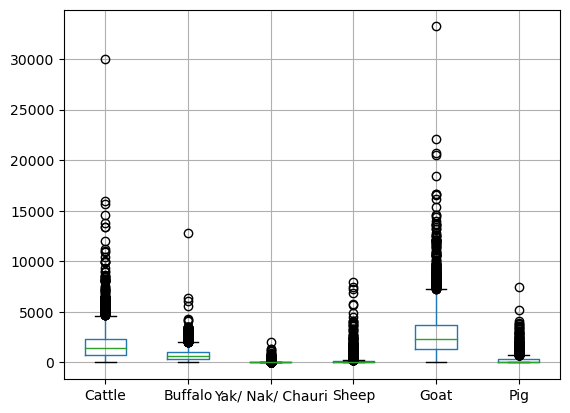

In [8]:
#boxplot distribution of different livestock

df.boxplot(column=['Cattle','Buffalo','Yak/ Nak/ Chauri','Sheep','Goat','Pig'])

# Scatter plot to view data relationship between different variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Data relationship between Buffalo and Cattle')

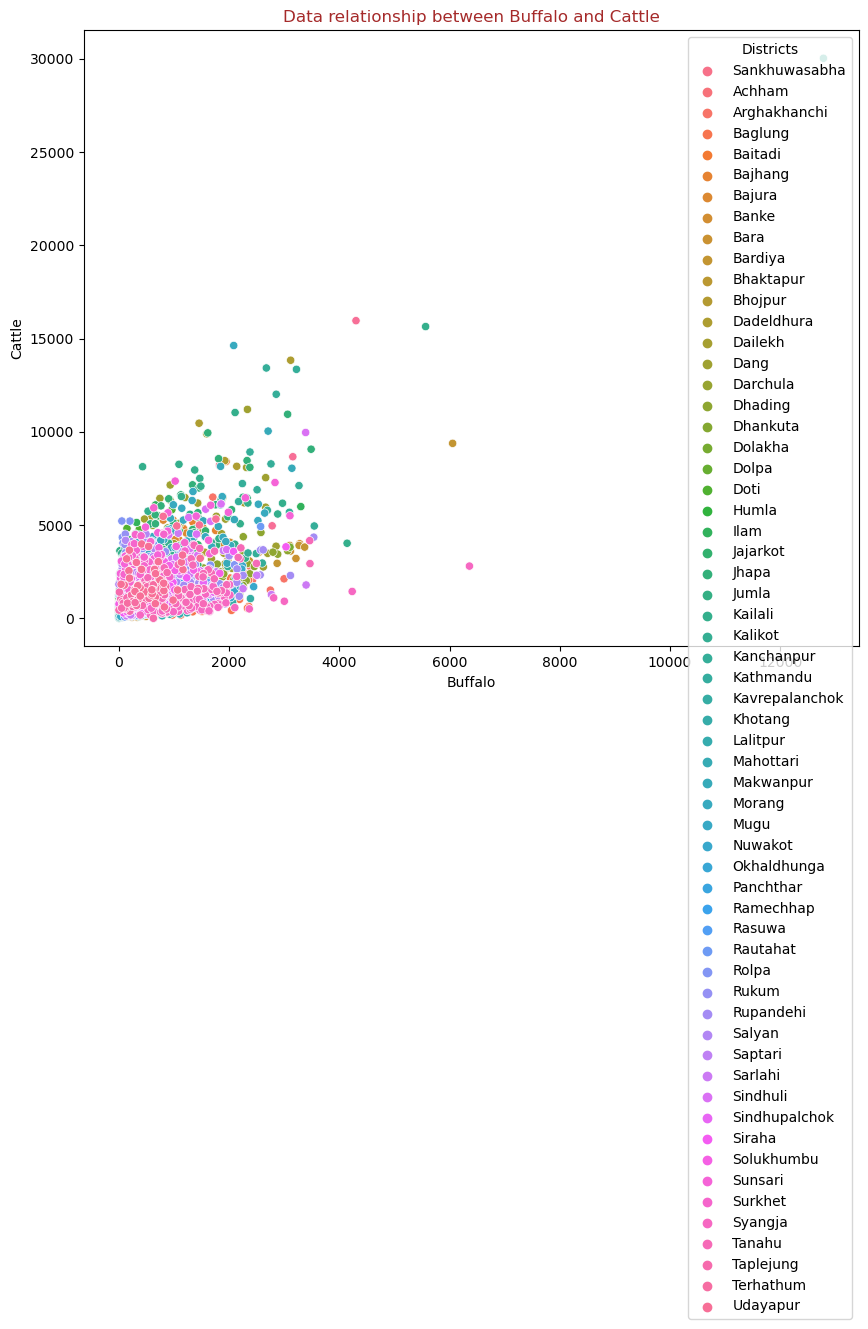

In [9]:
#scatter plot to view data relationship between Buffalo and Cattle

plt.figure(figsize=(10,8))
plt.legend(fontsize=18)
sns.scatterplot(data=df,x=df['Buffalo'],y=df['Cattle'],hue=df['Districts'])
plt.title('Data relationship between Buffalo and Cattle',color='brown')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Data relationship between Goat and Pig')

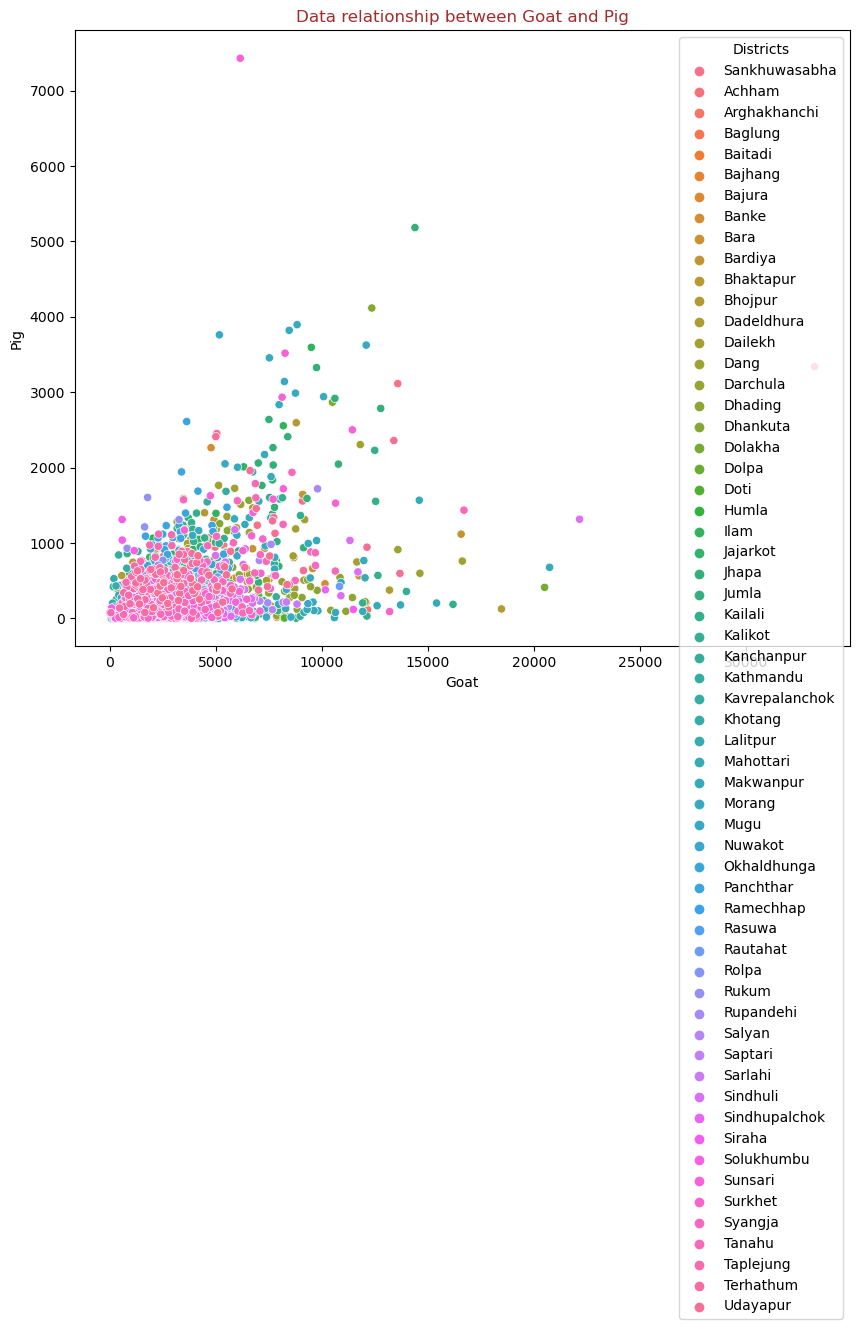

In [10]:
#scatter plot to view data relationship between Goat and Pig

plt.figure(figsize=(10,8))
plt.legend(fontsize=18)
sns.scatterplot(data=df,x=df['Goat'],y=df['Pig'],hue=df['Districts'])
plt.title('Data relationship between Goat and Pig',color='brown')

In [11]:
df=df.drop(columns='Unnamed: 0')

Text(0.5, 1.0, 'Heatmp of corelation between various livestocks')

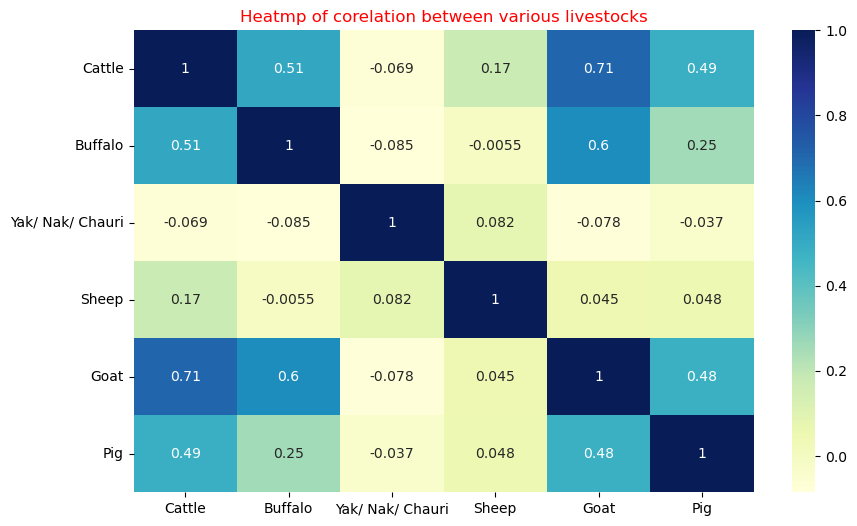

In [12]:
#heatmap of corelation between various livestocks

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Heatmp of corelation between various livestocks",color='red')

# Pie chart representing the proportion of each livestock

Text(0.0, 1.0, 'Total Livestock Count of Nepal')

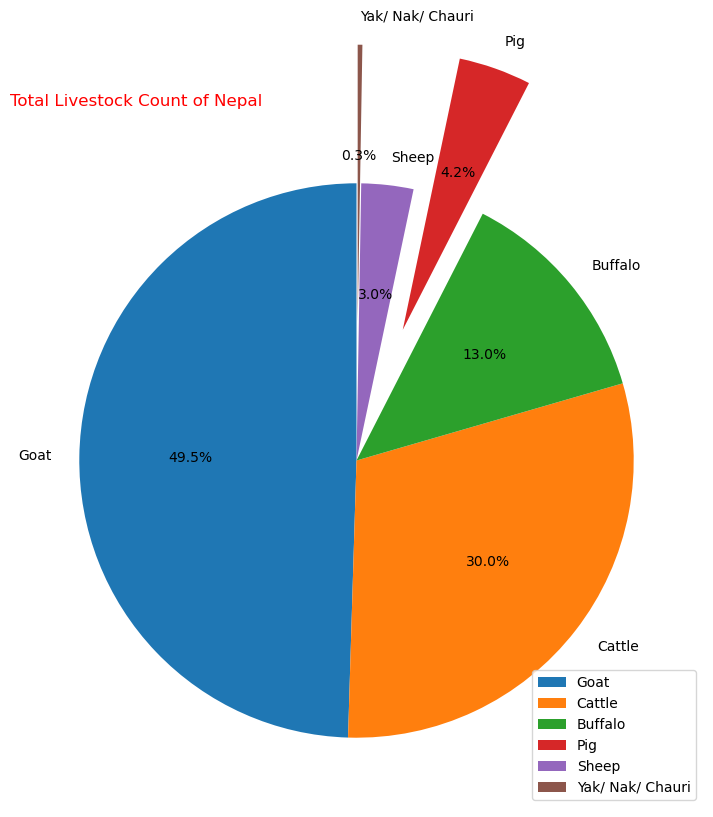

In [13]:
# pie chart representing the proportion of each livestock

mylabels=['Goat','Cattle','Buffalo','Pig','Sheep','Yak/ Nak/ Chauri']
plt.figure(figsize=(9,9))
myexplode=[0,0,0,0.5,0,0.5]
values=[df['Goat'].sum(),df['Cattle'].sum(),df['Buffalo'].sum(),df['Pig'].sum(),df['Sheep'].sum(),df['Yak/ Nak/ Chauri'].sum()]
plt.pie(data=df,x=values,labels=mylabels,autopct="%1.1f%%",shadow=False, startangle=90,explode=myexplode)
plt.legend(['Goat','Cattle','Buffalo','Pig','Sheep','Yak/ Nak/ Chauri'],loc="lower right")
plt.title("Total Livestock Count of Nepal",loc='left',color='red')

# Bar chart to compare the livestock counts between major 3 popular districts

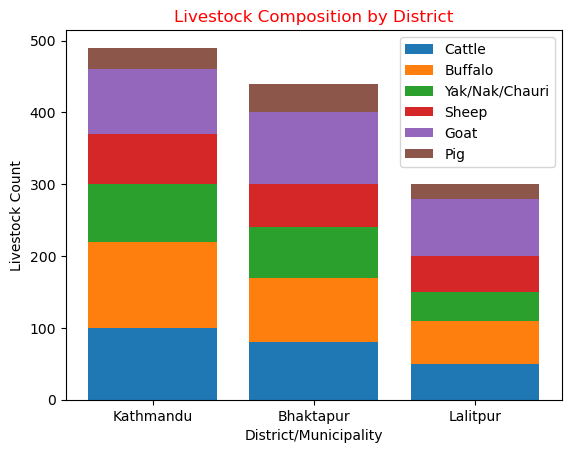

In [39]:
# Bar chart to compare the livestock counts between major 3 popular districts

livestock_categories = ['Cattle', 'Buffalo', 'Yak/Nak/Chauri', 'Sheep', 'Goat', 'Pig']
districts = ['Kathmandu','Bhaktapur','Lalitpur']  

livestock_counts = np.array([
    [df.loc[df['District'] == 'Kathmandu', 'Cattle'].sum(),
     df.loc[df['District'] == 'Kathmandu', 'Buffalo'].sum(),
     df.loc[df['District'] == 'Kathmandu', 'Yak/ Nak/ Chauri'].sum(),
     df.loc[df['District'] == 'Kathmandu', 'Sheep'].sum(),
     df.loc[df['District'] == 'Kathmandu', 'Goat'].sum(),
     df.loc[df['District'] == 'Kathmandu', 'Pig'].sum()],
    [df.loc[df['District'] == 'Bhaktapur', 'Cattle'].sum(),
     df.loc[df['District'] == 'Bhaktapur', 'Buffalo'].sum(),
     df.loc[df['District'] == 'Bhaktapur', 'Yak/ Nak/ Chauri'].sum(),
     df.loc[df['District'] == 'Bhaktapur', 'Sheep'].sum(),
     df.loc[df['District'] == 'Bhaktapur', 'Goat'].sum(),
     df.loc[df['District'] == 'Bhaktapur', 'Pig'].sum()],
    [df.loc[df['District'] == 'Lalitpur', 'Cattle'].sum(),
     df.loc[df['District'] == 'Lalitpur', 'Buffalo'].sum(),
     df.loc[df['District'] == 'Lalitpur', 'Yak/ Nak/ Chauri'].sum(),
     df.loc[df['District'] == 'Lalitpur', 'Sheep'].sum(),
     df.loc[df['District'] == 'Lalitpur', 'Goat'].sum(),
     df.loc[df['District'] == 'Lalitpur', 'Pig'].sum()]
])

plt.bar(districts, livestock_counts[:, 0], label=livestock_categories[0])
for i in range(1, len(livestock_categories)):
    plt.bar(districts, livestock_counts[:, i], bottom=np.sum(livestock_counts[:, :i], axis=1), label=livestock_categories[i])

plt.legend()

plt.xlabel('District/Municipality')
plt.ylabel('Livestock Count')
plt.title('Livestock Composition by District',color='red')

plt.show()